# <p style="text-align: center;"> Part Three: Outliers </p>

![title](Images\Outlier.jpg)

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# <p style="text-align: center;"> Table of Contents </p>
- ## 1. [Introduction](#Introduction)
   - ### 1.1 [Abstract](#abstract)
   - ### 1.2 [Importing Libraries](#importing_libraries)
- ## 2. [What are Outliers?](#outliers)
    - ### 2.1 [Types of Outliers](#outlier_types)
    - ### 2.2 [Impact of Outliers on a Dataset](#outlier_impact)
    - ### 2.3 [Outliers Detection Techniques](#outlier_detection)
    - ### 2.4 [Implementation](#implementation)
        - ### 2.4.1 [Inter Quartile Range](#iqr)
        - ### 2.4.2 [Standard Deviation](#sd)
        - ### 2.4.3 [Z-Score](#z_score)
        - ### 2.4.4 [Isolation Forest](#isolation_forest)
- ## 3. [Conclusion](#Conclusion)
- ## 4. [Contribution](#Contribution)
- ## 5. [Citation](#Citation)
- ## 6. [License](#License)

# <p style="text-align: center;"> 1.0 Introduction </p> <a id='Introduction'></a>

#   1.1 Abstract  <a id='abstract'></a>

Contrary to what most data science courses would have you believe, not every dataset is a perfectly curated group of observations with no missing values or outliers (For example mtcars and iris datasets). Real-world data is messy which means we need to clean and wrangle it into an acceptable format before we can even start the analysis. Data cleaning is an un-glamorous, but necessary part of most actual data science problems. In this notebook, I will try to explain what are outliers and it's types, how to detect outliers and also remidial measures for outliers

[Back to top](#Introduction)

#   1.2 Importing Libraries  <a id='importing_libraries'></a>

This is the official start to any Data Science or Machine Learning Project. A Python library is a reusable chunk of code that you may want to include in your programs/ projects. 
In this step we import a few libraries that are required in our program. Some major libraries that are used are Numpy, Pandas, MatplotLib, Seaborn, Sklearn etc.

[Back to top](#Introduction)

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# from sklearn import preprocessing

# plotting modules
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from astropy.table import Table, Column

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(34)

# 2.0 What are Outliers?  <a id='outliers'></a>
 
An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. It is also called anomalies.
Outliers can have many causes, such as:
- Measurement or input error.
- Data corruption.
- True outlier observation.

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data. This does not mean that the values identified are outliers and should be removed. A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationships or patterns to the outliers. If there is, perhaps they are not outliers and can be explained, or perhaps the outliers themselves can be identified more systematically.¶

[Back to Top](#Introduction)

## 2.1 Types of Outliers <a id='outlier_types'></a>

Outlier can be of two types: 

1. Univariate
2. Multivariate.

Univariate outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.


Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height

![title](Images\outlier_types.png)

[Back to Top](#Introduction)

## 2.2 Impact of Outliers on a Dataset <a id='outlier_impact'></a>

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.

![title](Images\outlier_impact.png)

As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely.

[Back to Top](#Introduction)

## 2.3 Outliers Detection Techniques <a id='outlier_detection'></a>

### 1. Interquartile Range Method

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.


In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.


It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

![title](Images\IQR.png)

### 2. Standard Deviation Method

Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

![title](Images\Standard_Deviation.png)


### 3. Z-Score method

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.


The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.


You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.


This technique assumes a Gaussian distribution of the data. The outliers are the data points that are in the tails of the distribution and therefore far from the mean. How far depends on a set threshold zthr for the normalized data points zi calculated with the formula:


> Z_score= (Xi - mean) / standard deviation


where Xi is a data point, 'mean' is the mean of all X and 'standard deviation' the standard deviation of all X.


An outlier is then a normalized data point which has an absolute value greater than Zthr. That is:
> |Z_score| > Zthr

Commonly used Zthr values are 2.5, 3.0 and 3.5. Here we will be using 3.0

### 4. Isolation Forest

Isolation forest is an algorithm to detect outliers. It partitions the data using a set of trees and provides an anomaly score looking at how isolated the point is in the structure found. The anomaly score is then used to tell apart outliers from normal observations.


An important concept in this method is the isolation number. The isolation number is the number of splits needed to isolate a data point. This number of splits is ascertained by following these steps:

- A point “a” to isolate is selected randomly.
- A random data point “b” is selected that is between the minimum and maximum value and different from “a”.
- If the value of “b” is lower than the value of “a”, the value of “b” becomes the new lower limit.
- If the value of “b” is greater than the value of “a”, the value of “b” becomes the new upper limit.
- This procedure is repeated as long as there are data points other than “a” between the upper and the lower limit.


It requires fewer splits to isolate an outlier than it does to isolate a non-outlier, i.e. an outlier has a lower isolation number in comparison to a non-outlier point. A data point is therefore defined as an outlier if its isolation number is lower than the threshold. The threshold is defined based on the estimated percentage of outliers in the data, which is the starting point of this outlier detection algorithm.

![title](Images\Isolation_Forest.png)

[Back to Top](#Introduction)

## 2.4 Implementation <a id='implementation'></a>
Lets load a few datasets to see the implementation of each of the methods above

## 2.4.1 Inter Quartile Range <a id='iqr'></a>

In [3]:
df_1 = pd.read_csv("Datasets/heart.csv")
df_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Basic Preprocessing checks

In [4]:
df_1.isnull().values.any()

False

In [5]:
df_1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis. I'll plot a simple box plot which is the best visualization for detecting outliers

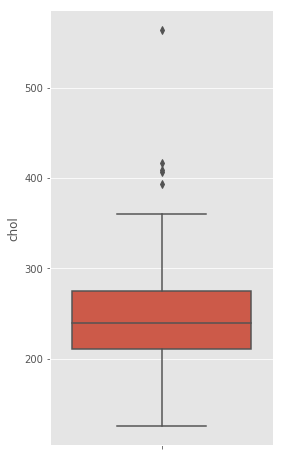

In [6]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

From the above box plot, we can surely observe that there are outliers in it!

Let's define a function to find out the IQR, lower and the upper whisker.

In [7]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [8]:
out_iqr(df_1,'chol')
#Input the dataset and the required column

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


As per the IQR method, there are 5 outliers.

**Visual representation:**

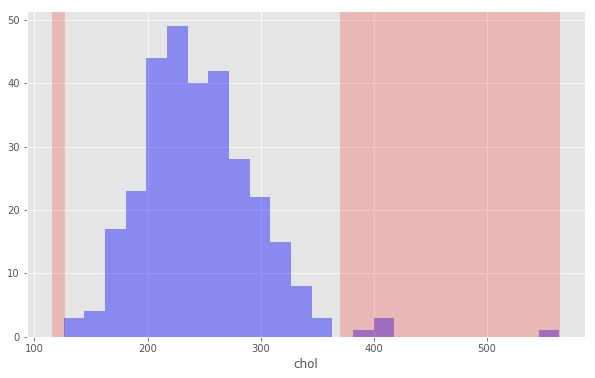

In [9]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False, color="b")
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

**Remedial Measure:**

Remove the records which are above the upper bound value and records below the lower bound value!

[Back to Top](#Introduction)

In [10]:
#Data Frame without outliers
df_new_1 = df_1[(df_1['chol'] < upper) | (df_1['chol'] > lower)]

## 2.4.2 Standard Deviation <a id='sd'></a>

In [11]:
df_2 = pd.read_csv("Datasets/StudentsPerformance.csv")
df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Basic Preprocessing checks

In [12]:
df_2.isnull().values.any()

False

In [13]:
df_2.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Let's consider the "writing score" for inspection. I'll plot a simple density plot which is also one of the best visualization for detecting outliers

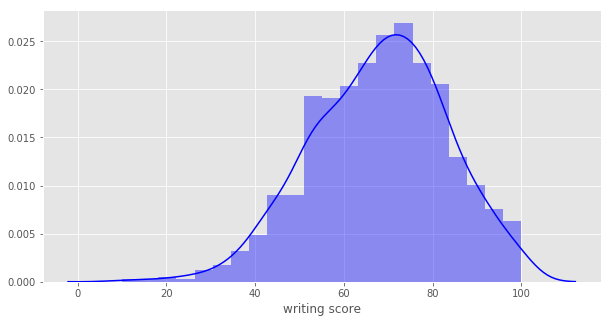

In [14]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'],color="b")

By the looks of it, it is left tailed and it surely has outliers.

Let's define a function to find out the lower and the upper whisker using SDM:

In [15]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [16]:
out_std(df_2,'writing score')

The lower bound value is 22.467028967391073
The upper bound value is 113.64097103260893
Total number of outliers are 4


So as per the SD method, there are 4 ouliters

**Visual Representation:**

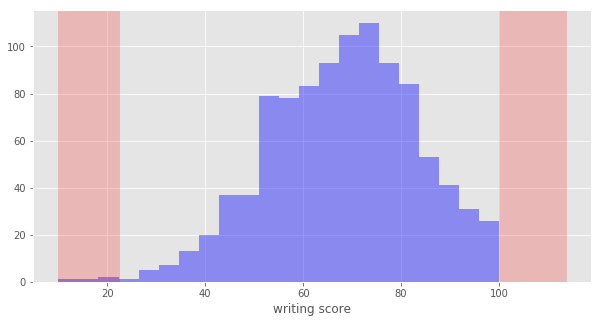

In [17]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], kde=False, color="b")
plt.axvspan(xmin = lower,xmax= df_2['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_2['writing score'].max(),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

**Remedial Measure:**

Remove the records which are above the upper bound value and records below the lower bound value!

[Back to Top](#Introduction)

In [18]:
#Data Frame without outliers
df_new_2 = df_2[(df_2['writing score'] < upper) | (df_2['writing score'] > lower)]

## 2.4.3 Z-Score <a id='z_score'></a>

In [19]:
df_3 = pd.read_csv("Datasets/insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Basic Preprocessing checks

In [20]:
df_2.isnull().values.any()

False

In [21]:
df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Let's consider the "charges" for inspection. I'll plot a simple density plot which is one of the best visualization for detecting outliers

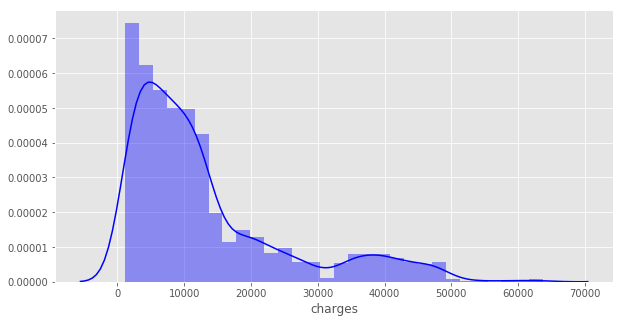

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(df_3['charges'], color="b")

By the looks of it, it is right tailed and it surely has outliers.

Let's define a function to find out the lower and the upper whisker using Z-Score method:

In [23]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [24]:
out_zscore(df_3.charges)

Total number of outliers are 7


According to z-score method, it has 7 outliers

**Visual Representation:**

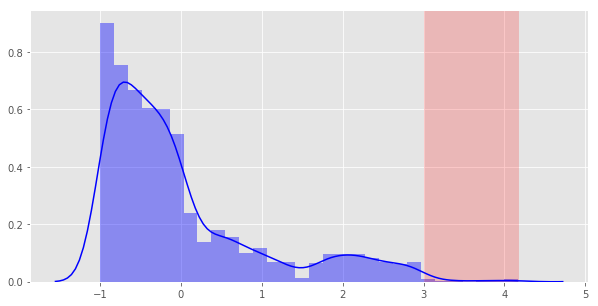

In [25]:
plt.figure(figsize = (10,5))
sns.distplot(zscore, color="b")
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

**Remedial Measure:**

Remove the records which are above the upper bound value and records below the lower bound value!

[Back to Top](#Introduction)

In [26]:
#Data Frame without outliers
df_new_3 = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]

## 2.4.4 Isolation Forest <a id='isolation_forest'></a>

C:\Users\Rushabh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\Rushabh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\Rushabh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


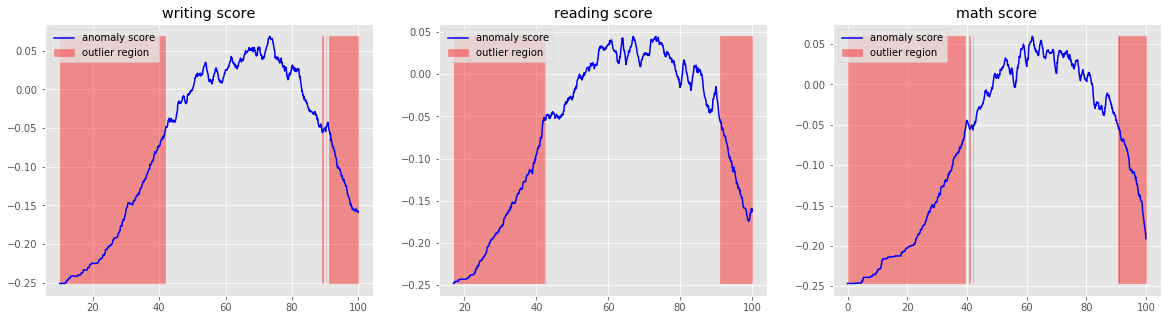

In [27]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['writing score','reading score','math score']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest()
    isolation_forest.fit(df_2[column].values.reshape(-1,1))

    xx = np.linspace(df_2[column].min(), df_2[column].max(), len(df_2)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score', color="b")
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)


In the snippet above, we have trained our IsolationForest using the data generated, computed the anomaly score for each observation, and classified each observation as an outlier or non-outlier. The chart shows the anomaly scores and the regions where the outliers are. As expected, the anomaly score reflects the shape of the underlying distribution and the outlier regions correspond to low probability areas

[Back to Top](#Introduction)

# <p style="text-align: center;">Conclusion<p><a id='Conclusion'></a>

While outlier removal forms an essential part of a dataset normalization, it’s important to ensure zero errors in the assumptions that influence outlier removal. Data with even significant number of outliers may not always be bad data and a rigorous investigation of the dataset in itself is often warranted, but overlooked, by data scientists in their processes

[Back to top](#Introduction)

# <p style="text-align: center;">Contribution<p><a id='Contribution'></a>

This was a fun project in which we explore the idea of Data cleaning and Data Preprocessing. We take inspiration from kaggle learning course and create our own notebook enhancing the same idea and supplementing it with our own contributions from our experiences and past projects.
       
- Code by self : 65%
- Code from external Sources : 35%

[Back to top](#Introduction)

# <p style="text-align: center;">Citation<p><a id='Citation'></a>

- https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
- https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified?select=insurance.csv
- https://statisticsbyjim.com/basics/remove-outliers/
- https://statisticsbyjim.com/basics/outliers/

# <p style="text-align: center;">License<p><a id='License'></a>
Copyright (c) 2020 Manali Sharma, Rushabh Nisher

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

[Back to top](#Introduction)